## Name all blocks of your grid

In [1]:
blocks_names = []

while True:
    block_name = input("Enter the next block name or 'ok' to finish.")
    if len(block_name) > 6:
        print("Only 6 character strings are accepted. Try again.")
    elif block_name == "ok":
        break
    elif block_name in blocks_names:
        print("This block name is already in the list of blocks")
        print(f"Blocks: {blocks_names}")
    else:
        blocks_names.append(block_name)
        
n_blocks = len(blocks_names)

print("\n")
print(f"Blocks: {blocks_names}")
print(f"n_blocks: {n_blocks}")

Enter the next block name or 'ok' to finish. duct1A
Enter the next block name or 'ok' to finish. duct1B
Enter the next block name or 'ok' to finish. duct1C
Enter the next block name or 'ok' to finish. ok




Blocks: ['duct1A', 'duct1B', 'duct1C']
n_blocks: 3


### Generate a block 2D section interactively

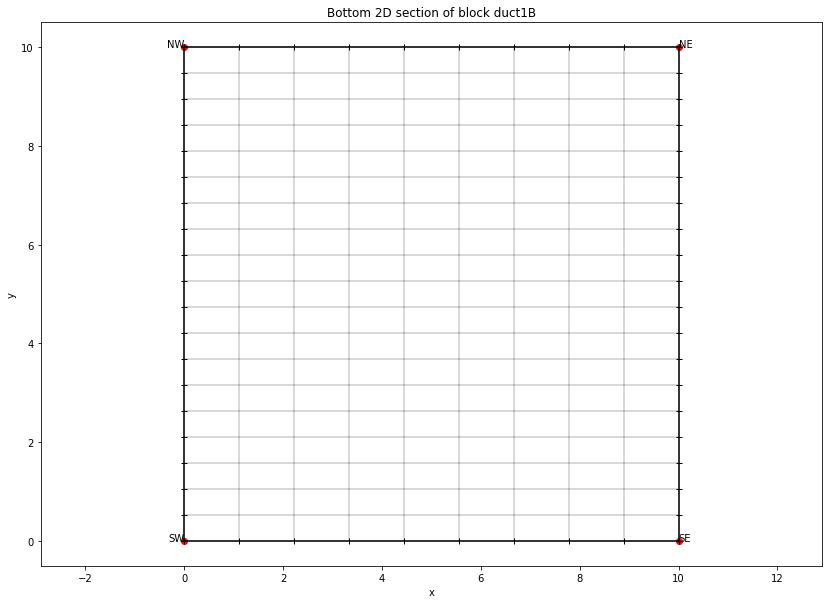

Does it has an offset?




Origin offset, x:  0
Origin offset, y:  0
Origin offset, z:  0




1 blocks remaining to be defined.


Block name:  duct1C
Is this block section identical to an already defined block? y/n y
Which one? duct1B


Does it has an offset?




Origin offset, x:  0
Origin offset, y:  0
Origin offset, z:  0


All blocks are defined, closing loop.
Blocks defined:
duct1A
duct1B
duct1C


In [2]:
# Third-party modules
from matplotlib import pyplot as plt

# Local modules
from pre.makegrid import makesurf

# Initialize a dict of all grid blocks
blocks = dict()

# Loop until all stated blocks are defined
while True:
    # State your block name
    while True:
        block_name = input("Block name: ")
        if block_name not in blocks_names:
            print("This block is not in your stated grid. Try again.")
        else:
            break
            
    # Is this block section identical to an already defined block? Which one?
    if blocks == {}:
        simil = False
    else:
        while True:
            simil = input("Is this block section identical to an already defined block? y/n")
            if simil == 'y':
                simil_block = input("Which one?")
                if simil_block not in blocks_names:
                    print("This block is not in your stated grid. Try again.")
                else:
                    simil = True
                    break
            else:
                simil = False
                break

    # If this block is identcial to another one skip this part
    if not simil:
        # Set the total number of cells (Control Volumes) in I and J directions
        # Number of cells in I and J direction
        while True:
            try:
                NICV = int(input("NICV: "))
                NJCV = int(input("NJCV: "))
                if NICV > 0 and NJCV > 0:
                    break
                else:
                    print("Only positive integers values are valid. Try again.")
            except:
                print("Only positive integers values are valid. Try again.")

        # Define edges names (2D bottom section)
        edges = ("South", "North", "West", "East")



        # Generate the surface of a grid block interactively
        # uniform cell distribution in all edges by default (uniform_cells=True0
        # Straight lines goes West-East by default (IDIR=1)
        # Return the block as a value of blocks dict    
        blocks[block_name] = makesurf(edges, NICV, NJCV, block_name, uniform_cells=True, IDIR=1)

        # Prevent duplicate figures.
        # By default Jupyter displays the last function return. We've already display the figure using IPython.display through ifig() function)
        plt.close()
        
    else:
        # This block is equal to the simil block stated before        
        blocks[block_name] = blocks[simil_block]

    # Does it has an offset?
    print("Does it has an offset?")
    print("\n")
    x_off = input("Origin offset, x: ")
    y_off = input("Origin offset, y: ")
    z_off = input("Origin offset, z: ")
    offset = (x_off, y_off, z_off)

    # Check if all blocks are defined
    if list(blocks.keys()) == blocks_names:
        print("All blocks are defined, closing loop.")
        break
    else:
        print("\n")
        print(f"{len(blocks_names) - len(blocks.keys())} blocks remaining to be defined.")
        
print("Blocks defined:")
for block in blocks.keys():
    print(block)